# Part 1
## Exploratory Data Analysis (EDA) and Feature Engineering

The objective is to perform EDA to understand the distribution of key features and correlations.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data_df=pd.read_csv("youth_smoking_drug_data_10000_rows_expanded.csv")

In [3]:
# make a copy of the data
data_df_copy=data_df.copy()

In [4]:
# Description of data
data_description = data_df_copy.describe()

In [5]:
# Check any missing values
missing=data_df_copy.isnull().sum()

In [6]:
# Drop unwanted data
data_df_cleaned=data_df_copy[data_df_copy['Age_Group'] != 'Oct-14']

In [7]:
data_df_cleaned.columns

Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')

C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


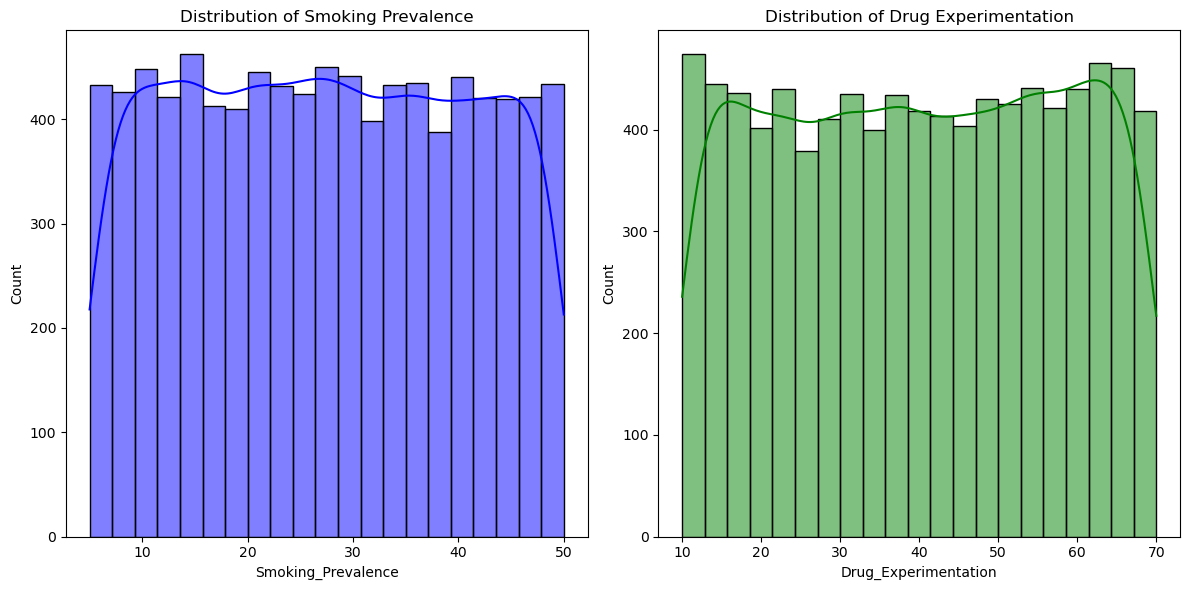

In [8]:
# Distribution of smoking prevalence and Drug Experimentation
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data_df_cleaned['Smoking_Prevalence'],kde=True,color='blue')
plt.title('Distribution of Smoking Prevalence')

plt.subplot(1,2,2)
sns.histplot(data_df_cleaned['Drug_Experimentation'], kde=True, color='green')
plt.title('Distribution of Drug Experimentation')
plt.tight_layout()
plt.show()

In [9]:
for column in data_df_cleaned.columns:
    print(f"{column} = {data_df_cleaned[column].dtype}")

Year = int64
Age_Group = object
Gender = object
Smoking_Prevalence = float64
Drug_Experimentation = float64
Socioeconomic_Status = object
Peer_Influence = int64
School_Programs = object
Family_Background = int64
Mental_Health = int64
Access_to_Counseling = object
Parental_Supervision = int64
Substance_Education = object
Community_Support = int64
Media_Influence = int64


In [10]:
#data_df_cleaned_new=data_df_cleaned['Age_Group'].drop
#corrMatrix=data_df_cleaned[numbered_cols].corr()

numeric_cols = data_df_cleaned.select_dtypes(include=['number']).columns.to_list()

In [12]:
data_cleaned_corr=data_df_cleaned[numeric_cols].corr()

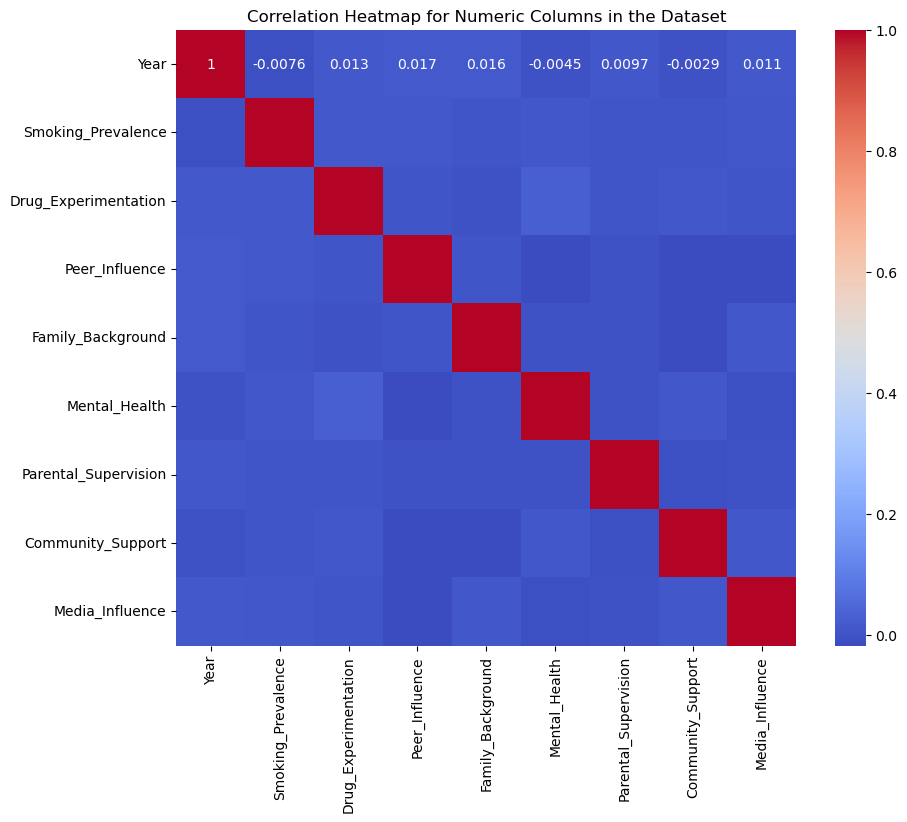

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaned_corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap for Numeric Columns in the Dataset')
plt.show()

## Feature Engineering

In [15]:
# Create a risk score (Normalize scores between 0 and 1)
# NB: Assuming each feature is rated from 0 to 10
data_df_cleaned.loc[:, 'Risk_Score']=(data_df_cleaned[['Peer_Influence','Family_Background','Mental_Health','Media_Influence']].sum(axis=1))/(4*10)

C:\Users\cheru\AppData\Local\Temp\ipykernel_6348\86911050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_cleaned.loc[:, 'Risk_Score']=(data_df_cleaned[['Peer_Influence','Family_Background',


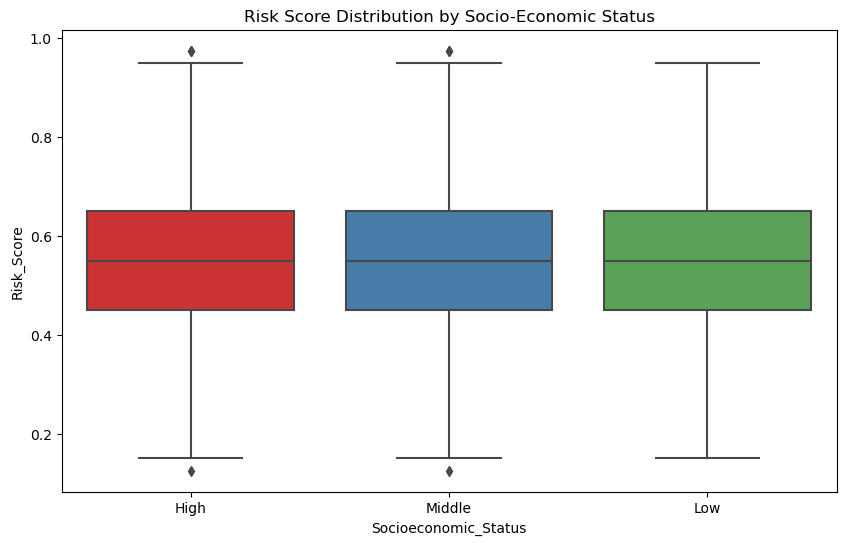

In [16]:
# Visualizing Risk Score by Socioeconomic status
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df_cleaned, x='Socioeconomic_Status', y='Risk_Score', palette='Set1')
plt.title('Risk Score Distribution by Socio-Economic Status')
plt.show()

In [19]:
# Export the output to csv file
output_path = '../Anaconda Python Scripts/Youth Smoking & Drug/Enhanced_dataset.csv'
data_df_cleaned.to_csv('Enhanced_dataset.csv', index=True)

In [20]:
print(data_description, "\n")
print(missing, "\n")
print(output_path)

               Year  Smoking_Prevalence  Drug_Experimentation  Peer_Influence  \
count  10000.000000        10000.000000          10000.000000    10000.000000   
mean    2022.000500           27.439257             40.150182        5.440100   
std        1.425027           12.975528             17.515917        2.863151   
min     2020.000000            5.000000             10.000000        1.000000   
25%     2021.000000           16.160000             24.920000        3.000000   
50%     2022.000000           27.355000             40.100000        5.000000   
75%     2023.000000           38.672500             55.462500        8.000000   
max     2024.000000           50.000000             69.990000       10.000000   

       Family_Background  Mental_Health  Parental_Supervision  \
count       10000.000000   10000.000000          10000.000000   
mean            5.513300       5.469800              5.528000   
std             2.865038       2.879326              2.891514   
min       

# Part 2

## **Predictive Modeling on Smoking Prevalence** 
Enhanced dataset will be used

### Data Preparation

In [21]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
enhanced_data=pd.read_csv("Enhanced_dataset.csv")

In [23]:
# Define the X and y targets
features=['Risk_Score','Drug_Experimentation','Peer_Influence','Family_Background',
         'Mental_Health','Community_Support','Media_Influence']
X = enhanced_data[features]
y=enhanced_data['Smoking_Prevalence']

In [24]:
# Split for training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Linear Regression Model

In [25]:
L_model=LinearRegression()
L_model.fit(X_train,y_train)
y_predicted_linear=L_model.predict(X_test)

### Random Forest Regressor

In [26]:
RF_model=RandomForestRegressor(random_state=42)
RF_model.fit(X_train,y_train)
y_predicted_rf=RF_model.predict(X_test)

### Evaluation Metrics

In [27]:
# Linear Regression Model
MSE_linear=mean_squared_error(y_test,y_predicted_linear)
r2_linear=r2_score(y_test,y_predicted_linear)

# Random Forest Model
MSE_rf=mean_squared_error(y_test,y_predicted_rf)
r2_rf=r2_score(y_test,y_predicted_rf)

In [28]:
# Outputs
results={
    "Linear Regression": {"MSE": MSE_linear, "R^2": r2_linear},
    "Random Forest Regressor": {"MSE": MSE_rf, "R^2": r2_rf}
}

# Convert the dictionary results to a DataFrame
results_df = pd.DataFrame(results).T # Transposed to have models as rows
results = results_df
results

,MSE,R^2
Linear Regression,167.738802,-0.002682
Random Forest Regressor,178.402867,-0.066428


# Part 3

## Classification of High-Risk Groups for Drug Experimentation

This project involves building a classification model to identify high-risk individuals for drug experimentation.

In [29]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
# Create binary for high-risk drup experimentation (Drug_Experimentation > 50%)
enhanced_data['High_Risk(DrugUse)']=(enhanced_data['Drug_Experimentation']>50).astype(int)

In [31]:
# Define the features (X) and targets (y)
features=['Risk_Score','Peer_Influence',
          'Family_Background','Mental_Health','Media_Influence']
X=enhanced_data[features]
y=enhanced_data['High_Risk(DrugUse)']

In [32]:
# Split the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression Model

In [33]:
log_model=LogisticRegression(max_iter=1000,random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

### Random Forest Classifier

In [34]:
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train,y_train)
y_pred_rf=classifier_rf.predict(X_test)

## Saving the model to device

In [132]:
import joblib
log_model=joblib.dump(log_model,'log_model.joblib') # (model, 'model_file_name.joblib')

In [133]:
# Load the model from the file
log_model = joblib.load('log_model.joblib')

## Visualizing the models

In [1]:
# the model MUST be a DecisionTreeClassifier or similar tree-based model, as export_graphviz is only compatible with tree-based estimators

# from sklearn import tree
# tree.export_graphviz(log_model, out_file='log_model.dot',
#                     feature_names=features, class_names=sorted(y.unique()),
#                     label='all', rounded=True, filled=True)

# A file will be created on the device, open it using vs-code.
# Install an extension callled 'Graphviz (dot) language' in vs-code
# Reload vs-code
# Click the 3 dots on the panel (on top-right side) > Open preview to the side

### Evaluation Metric

In [35]:
# Accuracy report
results_AR = {
    "Logistic Regression": {"Score": accuracy_score(y_test,y_pred_log), 
                            "Classification_Report": classification_report(y_test,y_pred_log)},
    "Random Forest Classifier": {"Score": accuracy_score(y_test,y_pred_rf),
                            "Classification_Report": classification_report(y_test,y_pred_rf)}
}
results_df=pd.DataFrame(results_AR)
results_df

C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Logistic Regression,Random Forest Classifier
Score,0.665308,0.599703
Classification_Report,precision recall f1-score ...,precision recall f1-score ...


# Part 4

### Impact Analysis of School Programs and Counseling Services

This part analyzes the impact of school programs and access to counseling services using statistical tests.

In [38]:
# import libraries
from scipy.stats import ttest_ind

In [39]:
enhanced_data.head(4)

,Unnamed: 0,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence,Risk_Score,High_Risk(DrugUse)
0,0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1,0.300,0
1,3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9,0.875,0
2,4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3,0.250,0
3,5,2022,70-79,Male,20.14,47.29,High,10,Yes,7,4,No,4,No,4,2,0.575,0


In [42]:
Have_school_program=enhanced_data[enhanced_data['School_Programs'] == 'Yes']['Smoking_Prevalence']
No_school_program=enhanced_data[enhanced_data['School_Programs'] == 'No']['Smoking_Prevalence']
t_statistics, p_value = ttest_ind(Have_school_program, No_school_program)

# Print results
print("Impact of Counseling on Drug Experimentation:\n t-statistic: {:.6f} \n p-value: {:.6f}".format(t_statistics,p_value))

Impact of Counseling on Drug Experimentation:
 t-statistic: -1.015508 
 p-value: 0.309891


# Part 5

### Creation of an Interactive Dashboard for Visualization and Insights

Streamlit will be used to create the interactive dashboard

In [43]:
# libraries for use
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Creation of an interactive dashboard for visualizations and insights

# necessary libraries
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set title
st.title("Youth Smoking and Drug Experimentation Dashboard")

# Load the dataset
enhanced_data=pd.read_csv("Enhanced_dataset.csv")

# Customizations of filters on the sidebar
age_group= st.sidebar.selectbox("Select Age Group", enhanced_data['Age_Group'].unique())
gender= st.sidebar.selectbox("Select Gender", enhanced_data['Gender'].unique())

# Filter dataset based on selection
filtered_data= enhanced_data[(enhanced_data['Age_Group'] == age_group) & (enhanced_data['Gender']==gender)]

# show filtered data
st.write("Filtered Data:", filtered_data)

# A plot of Smoking Prevalence vs Drug Experimentation
st.subheader("Smoking Prevalence vs Drug Experimentation")
fig, ax = plt.subplots()
sns.scatterplot(data=filtered_data, x='Smoking_Prevalence', y='Drug_Experimentation', hue='Risk_Score', palette='coolwarm', ax=ax)
st.pyplot(fig)

# A plot of Risk Score Distribution
st.subheader("Risk Score Distribution")
fig, ax = plt.subplots()
sns.histplot(data=enhanced_data['Risk_Score'], kde=True, ax=ax)
st.pyplot(fig)

# A plot showing Impacts of School Programs
st.subheader("Impact of School Programs on Smoking Prevalence")
fig,ax=plt.subplots()
sns.boxplot(data=enhanced_data,x='School_Programs', y='Smoking_Prevalence', palette='Set2', ax=ax)
st.pyplot(fig)

# run the dashboard, write the next line on your terminal
streamlit run app.py